# Random Forest
 
Use the Random Forest Algorithm to train and test a model.

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

nba_data = pd.read_csv('../output/new_nba_data.csv')
nba_data.sample(10, random_state=50)

,Name,GamesPlayed,MinutesPlayed,PointsPerGame,FieldGoalsMade,FieldGoalAttempts,FieldGoalPercent,3PointMade,3PointAttempts,3PointAttemptsPercent,...,FreeThrowAttempts,FreeThrowPercent,OffensiveRebounds,DefensiveRebounds,Rebounds,Assists,Steals,Blocks,Turnovers,CareerLongerThan5Years
456,Brandon Davies,51,11.3,2.8,1.1,2.5,42.2,0.0,0.2,20.0,...,1.0,64.2,0.7,1.4,2.1,0.5,0.5,0.2,0.7,0.0
303,Chris Washburn,35,11.0,3.8,1.6,4.1,39.3,0.0,0.0,0.0,...,1.5,35.3,1.0,1.9,2.9,0.5,0.2,0.2,1.1,0.0
772,Devin Booker,76,27.7,13.8,4.8,11.4,42.3,1.3,3.8,34.3,...,3.4,84.0,0.4,2.1,2.5,2.6,0.6,0.3,2.1,0.0
1298,Corie Blount,67,10.3,3.0,1.1,2.6,43.7,0.0,0.0,0.0,...,1.1,61.3,1.1,1.8,2.9,0.8,0.3,0.5,0.8,1.0
829,Allan Ray,47,15.1,6.2,2.1,5.5,38.6,1.0,2.5,41.4,...,1.2,76.4,0.4,1.1,1.5,0.9,0.4,0.1,0.9,0.0
262,Milt Wagner,40,9.5,3.8,1.6,3.7,42.2,0.1,0.3,20.0,...,0.7,89.7,0.1,0.6,0.7,1.5,0.1,0.1,0.6,0.0
1147,Adreian Payne,32,23.1,6.7,2.8,6.9,41.4,0.0,0.3,11.1,...,1.4,65.2,1.5,3.6,5.1,0.9,0.6,0.3,1.4,0.0
1181,Ray Owes,57,10.4,3.1,1.3,3.2,41.7,0.0,0.1,20.0,...,0.8,56.5,1.1,1.7,2.9,0.3,0.3,0.3,0.4,0.0
196,Tom Garrick,71,21.1,6.4,2.5,5.1,49.0,0.0,0.2,0.0,...,1.8,80.3,0.5,1.7,2.2,3.4,1.1,0.1,1.6,0.0
854,Charlie Villanueva,81,29.1,13.0,5.4,11.6,46.3,0.9,2.6,32.7,...,2.0,70.6,2.2,4.2,6.4,1.1,0.7,0.8,1.2,1.0


The names of the players are not required for decisions, so we will be ignoring it

In [3]:
nba_data.drop('Name', inplace=True, axis=1)

In [4]:
X = nba_data[nba_data.columns[:-1]]
y = nba_data['CareerLongerThan5Years']
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=50,stratify=y)
dt_model = RandomForestClassifier(random_state=50)
dt_model.fit(train_X, train_y)
pred_y = dt_model.predict(test_X)

print('Accuracy: {:.2%}'.format(metrics.accuracy_score(test_y, pred_y))) 
print('Recall: {:.2%}'.format(metrics.recall_score(test_y, pred_y))) 
print('Precision: {:.2%}'.format(metrics.precision_score(test_y, pred_y))) 
print('F1 Score: {:.2%}'.format(metrics.f1_score(test_y, pred_y)))

Accuracy: 69.25%
Recall: 78.85%
Precision: 73.54%
F1 Score: 76.10%


The accuracy of 69% is pretty low. So let's try using a Cross-Validation to see if the random split affects our test.

In [5]:
scores = cross_val_score(dt_model, X, y, scoring='accuracy', cv=5)
scores.mean()

0.6813432835820896

By using cross validation, the score is 68%. Let's take a look at the Feature Importances.

In [6]:
feature_importances = pd.Series(dt_model.feature_importances_, index=nba_data.columns[:-1])
feature_importances.sort_values(ascending=False)

GamesPlayed              0.120035
PointsPerGame            0.072762
FieldGoalPercent         0.069790
FreeThrowPercent         0.063547
MinutesPlayed            0.060657
FieldGoalsMade           0.060537
FreeThrowMade            0.054399
FieldGoalAttempts        0.054145
DefensiveRebounds        0.051616
FreeThrowAttempts        0.050959
Rebounds                 0.048327
Assists                  0.046434
3PointAttemptsPercent    0.046243
OffensiveRebounds        0.044278
Turnovers                0.039989
3PointAttempts           0.033868
Blocks                   0.030166
Steals                   0.030091
3PointMade               0.022158
dtype: float64

<AxesSubplot: >

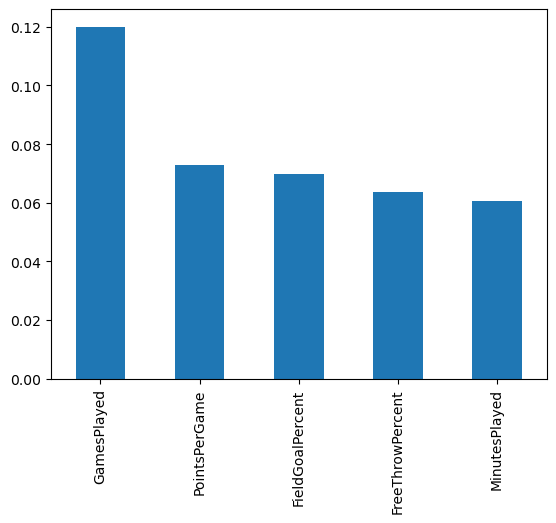

In [7]:
feature_importances.nlargest(5).plot(kind='bar')

First, let's try the train-validation-test method to play around with the hyperparameters. we'll use a 70%-15%-15% split.

array([<AxesSubplot: ylabel='0'>], dtype=object)

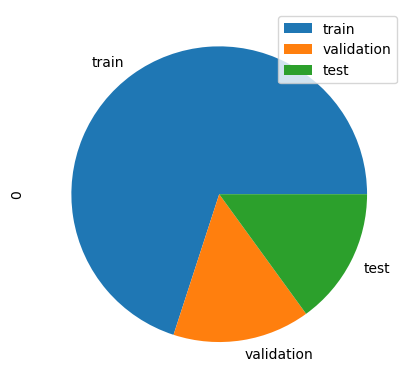

In [25]:
X_train, X_test_full, y_train, y_test_full = train_test_split(X, y, random_state=50, test_size=0.3, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_test_full, y_test_full, random_state=50, test_size=0.5, stratify=y_test_full)

pd.DataFrame([len(y_train), len(y_val), len(y_test)], index=['train','validation', 'test']).plot(kind='pie', subplots=True)

Let's verify if the data has been split correctly.

<AxesSubplot: title={'center': 'test'}, ylabel='CareerLongerThan5Years'>

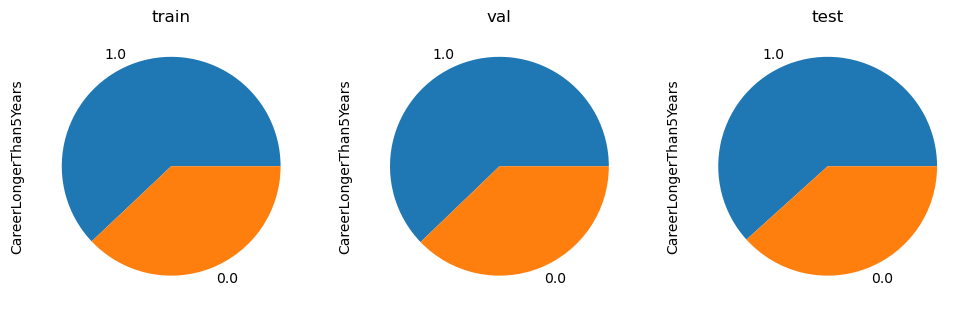

In [26]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,6))
y_train.value_counts().plot(kind='pie', ax=ax1, title='train')
y_val.value_counts().plot(kind='pie', ax=ax2, title='val')
y_test.value_counts().plot(kind='pie', ax=ax3, title='test')

In [10]:
dt_model = RandomForestClassifier(random_state=50) 
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_val)
accuracy_score = metrics.accuracy_score(y_val, y_pred)
print('Accuracy: {:.2%}'.format(accuracy_score)) 

Accuracy: 65.12%


Let's play with the hyperparameters and see if we can get a better result. Let's start with max depth.

In [11]:
def train_and_find_best_depth(X_train, X_val, y_train, y_val, do_print): 
    result = None
    accuracy_max = -1
    for curr_max_depth in range(1, 20):
        dt_model = RandomForestClassifier(max_depth=curr_max_depth,random_state=50) 
        dt_model.fit(X_train, y_train)
        y_pred = dt_model.predict(X_val)
        accuracy_score = metrics.accuracy_score(y_val, y_pred)

        if accuracy_score >= accuracy_max: 
            accuracy_max = accuracy_score 
            result = curr_max_depth
            if do_print:
                print('max depth {}: {:.2%} accuracy on validation set.'.format(curr_max_depth, accuracy_score))
            if do_print: 
                print('-' * 20)
    print('best max depth {} has {:.2%} accuracy.'.format(result,accuracy_max))

    return result
    
best_max_depth = train_and_find_best_depth(X_train, X_val, y_train, y_val, True)

max depth 1: 64.77% accuracy on validation set.
--------------------
max depth 2: 65.84% accuracy on validation set.
--------------------
max depth 3: 66.55% accuracy on validation set.
--------------------
max depth 4: 67.62% accuracy on validation set.
--------------------
max depth 5: 67.97% accuracy on validation set.
--------------------
best max depth 5 has 67.97% accuracy.


Let's continue with n_estimators. AKA the number of trees in the forest.

In [12]:
def train_and_find_n_estimators(X_train, X_val, y_train, y_val, do_print): 
    result = None
    accuracy_max = -1
    for n_estimators in range(1, 100):
        dt_model = RandomForestClassifier(n_estimators=n_estimators,random_state=50) 
        dt_model.fit(X_train, y_train)
        y_pred = dt_model.predict(X_val)
        accuracy_score = metrics.accuracy_score(y_val, y_pred)

        if accuracy_score >= accuracy_max: 
            accuracy_max = accuracy_score 
            result = n_estimators
            if do_print:
                print('n estimators {}: {:.2%} accuracy on validation set.'.format(n_estimators, accuracy_score))
            if do_print: 
                print('-' * 20)
    print('n estimators {} has {:.2%} accuracy.'.format(result,accuracy_max))

    return result
    
best_n_estimators = train_and_find_n_estimators(X_train, X_val, y_train, y_val, True)

n estimators 1: 57.30% accuracy on validation set.
--------------------
n estimators 2: 57.30% accuracy on validation set.
--------------------
n estimators 3: 59.43% accuracy on validation set.
--------------------
n estimators 4: 60.14% accuracy on validation set.
--------------------
n estimators 5: 62.28% accuracy on validation set.
--------------------
n estimators 6: 62.99% accuracy on validation set.
--------------------
n estimators 7: 64.06% accuracy on validation set.
--------------------
n estimators 8: 65.12% accuracy on validation set.
--------------------
n estimators 10: 65.84% accuracy on validation set.
--------------------
n estimators 18: 65.84% accuracy on validation set.
--------------------
n estimators 24: 66.19% accuracy on validation set.
--------------------
n estimators 28: 66.90% accuracy on validation set.
--------------------
n estimators 30: 67.26% accuracy on validation set.
--------------------
n estimators 30 has 67.26% accuracy.


Now let's try to adjust the min_samples_split parameter which is the minimal number of different data placed in a node before the node is split

In [13]:
def train_and_find_min_samples_split(X_train, X_val, y_train, y_val, do_print): 
    result = None
    accuracy_max = -1
    for min_samples_split in range(2, 20):
        dt_model = RandomForestClassifier(min_samples_split=min_samples_split,random_state=50) 
        dt_model.fit(X_train, y_train)
        y_pred = dt_model.predict(X_val)
        accuracy_score = metrics.accuracy_score(y_val, y_pred)

        if accuracy_score >= accuracy_max: 
            accuracy_max = accuracy_score 
            result = min_samples_split
            if do_print:
                print('min samples split {}: {:.2%} accuracy on validation set.'.format(min_samples_split, accuracy_score))
            if do_print: 
                print('-' * 20)
    print('min samples split {} has {:.2%} accuracy.'.format(result,accuracy_max))

    return result

min_samples_split = train_and_find_min_samples_split(X_train, X_val, y_train, y_val, True)

min samples split 2: 65.12% accuracy on validation set.
--------------------
min samples split 3: 65.12% accuracy on validation set.
--------------------
min samples split 4: 66.19% accuracy on validation set.
--------------------
min samples split 5: 66.55% accuracy on validation set.
--------------------
min samples split 7: 66.55% accuracy on validation set.
--------------------
min samples split 8: 66.90% accuracy on validation set.
--------------------
min samples split 9: 67.97% accuracy on validation set.
--------------------
min samples split 19: 68.33% accuracy on validation set.
--------------------
min samples split 19 has 68.33% accuracy.


Let's try the max_features parameter. It is the max number of features who are considered when splitting a node.

In [14]:
def train_and_find_max_features(X_train, X_val, y_train, y_val, do_print): 
    result = None
    accuracy_max = -1
    for max_features in range(1, 20):
        dt_model = RandomForestClassifier(max_features=max_features,random_state=50) 
        dt_model.fit(X_train, y_train)
        y_pred = dt_model.predict(X_val)
        accuracy_score = metrics.accuracy_score(y_val, y_pred)

        if accuracy_score >= accuracy_max: 
            accuracy_max = accuracy_score 
            result = max_features
            if do_print:
                print('max features split {}: {:.2%} accuracy on validation set.'.format(max_features, accuracy_score))
            if do_print: 
                print('-' * 20)
    print('max features split {} has {:.2%} accuracy.'.format(result,accuracy_max))

    return result

max_features = train_and_find_max_features(X_train, X_val, y_train, y_val, True)

max features split 1: 66.19% accuracy on validation set.
--------------------
max features split 9: 68.33% accuracy on validation set.
--------------------
max features split 9 has 68.33% accuracy.


In [22]:
dt_model = RandomForestClassifier(max_depth=best_max_depth,n_estimators=best_n_estimators, random_state=50, min_samples_split=min_samples_split,max_features=max_features)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
accuracy_score_imputed = metrics.accuracy_score(y_test, y_pred) 
print('Accuracy: {:.2%}'.format(metrics.accuracy_score(y_test, y_pred))) 
print('Recall: {:.2%}'.format(metrics.recall_score(y_test, y_pred))) 
print('Precision: {:.2%}'.format(metrics.precision_score(y_test, y_pred))) 
print('F1 Score: {:.2%}'.format(metrics.f1_score(y_test, y_pred)))

Accuracy: 71.90%
Recall: 83.33%
Precision: 70.51%
F1 Score: 76.39%


Imputing data is not required. The only data that we missed were the Percent of successful 3-Throws of players who did not have any 3 Throws (0)

By using the train-validation test method without any hyperparameters, an accuracy of 65% has been reached. By adding hyperparameters, it rose up to ca. 72%. Which is a little higher than the train-test split method (69.3%).